# BoxWorld Results

In [1]:
colab = False

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from RelationalModule import ActorCritic
from RelationalModule import train_agent as train
from importlib import reload

In [9]:
def print_params(params):
    for p in params.keys():
        print(p, params[p])

In [12]:
# Load data
save_dir = 'Results/BoxWorld/Simplified/'
agent = torch.load(save_dir+"trained_agent2", map_location=torch.device('cpu'))
game_params = np.load(save_dir+"game_params2.npy", allow_pickle=True).item()
HPs = np.load(save_dir+"HP2.npy", allow_pickle=True).item()
score1 = np.load(save_dir+"performance1.npy")
score2 = np.load(save_dir+"performance2.npy")
score = np.concatenate((score1,score2))

In [13]:
print_params(HPs)

action_space 4
lr 0.0001
gamma 0.99
TD True
twin True
tau 0.02
n_steps 50
device cuda


In [14]:
print_params(game_params)

grid_size 7
solution_length [1]
num_forward [0]
num_backward [0]
branch_length 1


In [15]:
def plot_score(score):
    plt.figure(figsize=(8,6))
    n_epochs = np.arange(100, len(score))
    average_score = np.array([np.mean(score[i:i+100]) for i in range(len(score)-100)])
    plt.plot(n_epochs, average_score, alpha=0.9)
    plt.title("Performance over time", fontsize=16)
    plt.xlabel("Number of episodes", fontsize=16)
    plt.ylabel("Reward moving average [last 100]", fontsize=16)
    plt.show()

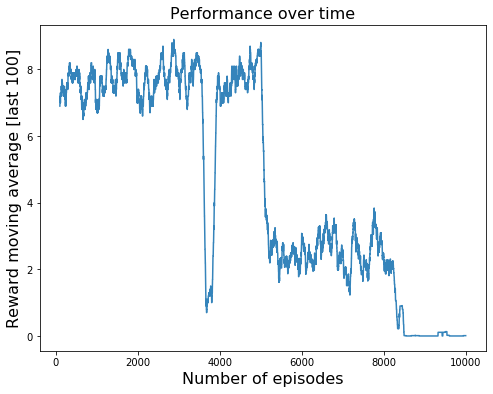

In [16]:
plot_score(score)

In [17]:
score0 = np.load(save_dir+"performance0.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'Results/BoxWorld/Simplified/performance0.npy'